# SVM

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
np.random.seed(0)
n = 100
time = np.arange(n)
data = np.sin(0.1 * time) + 0.1 * np.random.randn(n) 

lag = 3
df = pd.DataFrame({
    f"lag_{i}": data[i: n - lag + i] for i in range(lag)
})
df['target'] = data[lag:]


In [ ]:
X = df.iloc[:, :-1].values  
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [82]:
model = SVR(kernel='rbf', C=10, gamma=0.1)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

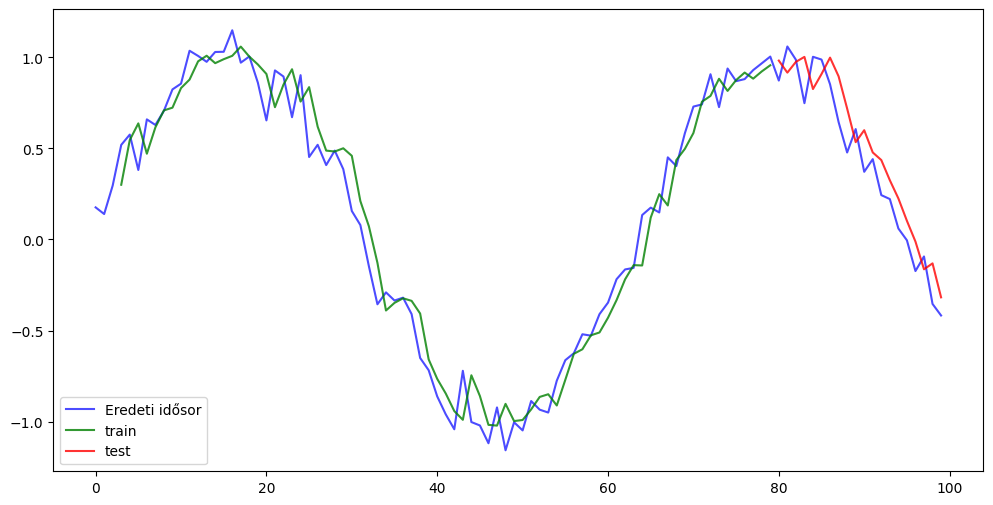

In [83]:

plt.figure(figsize=(12, 6))
plt.plot(time, data, label='Eredeti idősor', color='blue', alpha=0.7)
plt.plot(time[lag: len(y_pred_train) + lag], y_pred_train, label='train', color='green', alpha=0.8)
plt.plot(time[len(y_pred_train) + lag:], y_pred_test, label='test', color='red', alpha=0.8)
plt.legend()
plt.show()


In [76]:
model = SVR(kernel='rbf', C=10, gamma=0.1)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_mape = mape(y_train, y_pred_train)
test_mape = mape(y_test, y_pred_test)

train_mape, test_mape

(5880566532407.204, 0.1482355573807111)

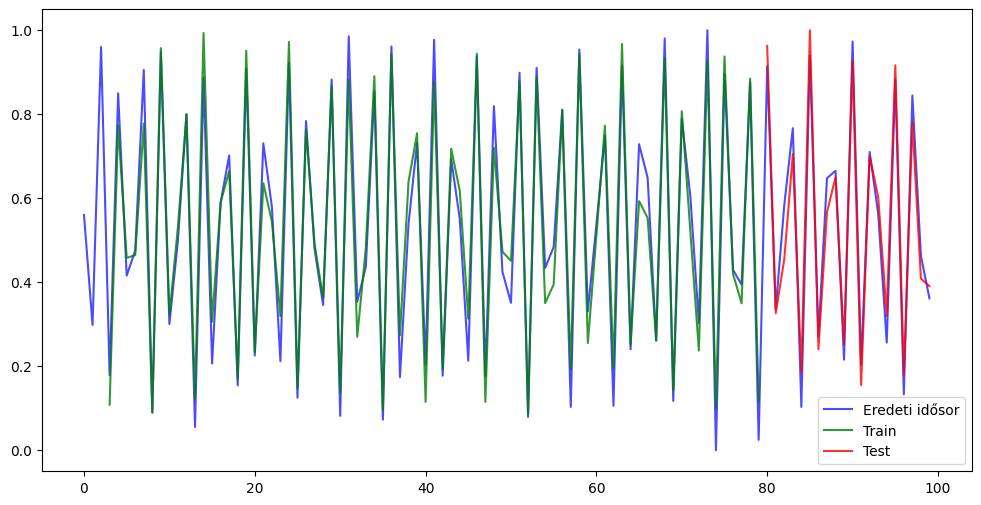

In [77]:
plt.figure(figsize=(12, 6))
plt.plot(time, data, label='Eredeti idősor', color='blue', alpha=0.7)
plt.plot(time[lag: len(y_pred_train) + lag], y_pred_train, label='Train', color='green', alpha=0.8)
plt.plot(time[len(y_pred_train) + lag:], y_pred_test, label='Test', color='red', alpha=0.8)
plt.legend()
plt.show()


In [2]:
import numpy as np
import pandas as pd

# ANN

![img](https://cdn.shopify.com/s/files/1/0611/1644/9018/files/XOR_Logic_Gate_symbol_with_truth_table_480x480.jpg?v=1681931209)

In [6]:
data = {
    'x1': [0, 0, 1, 1],
    'x2': [0, 1, 0, 1],
    'y':    [0, 1, 1, 0] 
}

df = pd.DataFrame(data)

![img](https://www.researchgate.net/profile/Ahmad-Mohamad-Mezher/publication/352338692/figure/fig12/AS:1037132248403970@1624283005647/General-scheme-of-an-artificial-neural-network-ANN.png)

In [10]:
df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [9]:
X = df[['x1', 'x2']].values
y = df['y'].values.reshape(-1, 1)

input_size = 2 
hidden_size = 2
output_size = 1
learning_rate = 0.1

In [11]:
np.random.seed(42)

weights_input_hidden = np.random.randn(input_size, hidden_size)
bias_hidden = np.random.randn(1, hidden_size)
weights_hidden_output = np.random.randn(hidden_size, output_size)
bias_output = np.random.randn(1, output_size)

In [21]:
# Aktivációs függvények

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# a backpropagation (visszaterjesztés) során kelleni fog a meredekség
def sigmoid_derivative(x):
    return x * (1 - x)

In [31]:
# Tanulás

hidden_layer_input = np.dot(X, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)


In [38]:
# hiba
error = y - predicted_output
mean_squared_error = np.mean(error**2)

In [45]:
# a hiba visszaterjesztése
d_predicted_output = error * sigmoid_derivative(predicted_output)
error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

In [41]:
# súlyok frissítése
weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate
bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate